In [54]:
%matplotlib inline  
import requests
import xml.etree.ElementTree as ET
import os
import pandas as pd
import numpy as np
from termcolor import colored

### プレイヤー情報を辞書に追加

In [32]:
url = 'https://gd2.mlb.com/components/game/mlb/year_2014/month_06/day_18/gid_2014_06_18_colmlb_lanmlb_1/players.xml'
resp = requests.get(url) 
xmlfile = "myplayers.xml"

with open(xmlfile, mode='wb') as f:
    f.write(resp.content)
statinfo = os.stat(xmlfile)  

# xml file analysis
tree = ET.parse(xmlfile)
game = tree.getroot()
teams = game.findall("./team")
playerDict = {}

for team in teams:
    players = team.findall("./player")
    for player in players:
        # get player ID and player names
        print("   ", player.attrib.get("id"), player.attrib.get("first"), player.attrib.get("last"))
        # add player ID and player names to dictionary
        playerDict[ player.attrib.get("id") ] = player.attrib.get("first") + " " + player.attrib.get("last") 

    115629 LaTroy Hawkins
    150212 Michael Cuddyer
    279571 Matt Belisle
    407822 Jorge De La Rosa
    408047 Justin Morneau
    434665 Nick Masset
    453064 Troy Tulowitzki
    453211 Drew Stubbs
    453568 Charlie Blackmon
    455119 Chris Martin
    457429 Boone Logan
    462985 Franklin Morales
    468504 Jhoulys Chacin
    471865 Carlos Gonzalez
    474463 Brett Anderson
    488681 Brandon Barnes
    493603 Adam Ottavino
    501647 Wilin Rosario
    502374 Michael McKenry
    518586 Charlie Culberson
    518934 DJ LeMahieu
    543022 Tyler Chatwood
    543475 Jordan Lyles
    548357 Christian Bergman
    554431 Tyler Matzek
    571448 Nolan Arenado
    571521 Rex Brothers
    572253 Ryan Wheeler
    572750 Eddie Butler
    572816 Corey Dickerson
    592454 Tommy Kahnle
    592621 Kyle Parker
    592710 Josh Rutledge
    124604 Jamey Wright
    277417 Josh Beckett
    346874 Juan Uribe
    408210 Chone Figgins
    408236 Adrian Gonzalez
    408307 Carl Crawford
    425844 Za

### イニングのデータを取得

In [33]:
url = 'https://gd2.mlb.com/components/game/mlb/year_2014/month_06/day_18/gid_2014_06_18_colmlb_lanmlb_1/inning/inning_all.xml'
resp = requests.get(url) 
xmlfile = "mygame.xml"
with open(xmlfile, 'wb') as f: 
    f.write(resp.content)
statinfo = os.stat(xmlfile)  

tree = ET.parse(xmlfile)
root = tree.getroot()

for child in root:
    # get inning info
    print (child.tag, child.attrib.get("num"))
    for frame in child:
        print ("   ", frame.tag, frame.attrib)

inning 1
    top {}
    bottom {}
inning 2
    top {}
    bottom {}
inning 3
    top {}
    bottom {}
inning 4
    top {}
    bottom {}
inning 5
    top {}
    bottom {}
inning 6
    top {}
    bottom {}
inning 7
    top {}
    bottom {}
inning 8
    top {}
    bottom {}
inning 9
    top {}


### 各イニングのバッターに対する投球数と球種を取得

In [34]:
frames = ["top", "bottom"]

# create dictionary for type of pitches
pitchDictionary = { "FA":"fastball", "FF":"4-seam fb", "FT": "2-seam fb", "FC": "fb-cutter", "":"unknown", None: "none",
                    "FS":"fb-splitter", "SL":"slider", "CH":"changeup","CU":"curveball","KC":"knuckle-curve",
                    "KN":"knuckleball","EP":"eephus", "UN":"unidentified", "PO":"pitchout", "SI":"sinker", "SF":"split-finger"
                    }

# create total pitches
totalPitchCount = 0

innings = root.findall("./inning")
for inning in innings:
    for i in range(len(frames)):
        color = "green" if i == 0 else "yellow"
        print(colored("\nInning " + inning.attrib.get("num") + " (" + frames[i] + ")", color, attrs=['reverse']))

        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter('atbat'):
                battername = playerDict[ab.get('batter')]
                
                # create number of pitches for the batter at each bat
                abPitchCount = 0
                
                print (colored("   " + battername, color, attrs=['bold']))
                
                pitches = ab.findall("pitch")
                for p in pitches:
                    # add a pitch to total pitches and number of pitches
                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1

                    # get number of pitches and type of pitches for at each bat
                    verbosePitch = pitchDictionary[p.get("pitch_type")]
                    print(colored("      pitch " + str(abPitchCount) + ": " + verbosePitch, color))

                # get the result of the play
                print("      " + colored( ab.attrib.get("event"), color, attrs=['underline']))

# get the total pithes
print("Total pitches: " + str(totalPitchCount))


Inning 1 (top)
   Corey Dickerson
      pitch 1: 4-seam fb
      pitch 2: 4-seam fb
      pitch 3: 4-seam fb
      pitch 4: slider
      pitch 5: 4-seam fb
      pitch 6: slider
      Strikeout
   Brandon Barnes
      pitch 1: 4-seam fb
      Flyout
   Troy Tulowitzki
      pitch 1: 4-seam fb
      pitch 2: slider
      pitch 3: curveball
      pitch 4: slider
      pitch 5: 4-seam fb
      Groundout

Inning 1 (bottom)
   Dee Gordon
      pitch 1: 4-seam fb
      pitch 2: 4-seam fb
      pitch 3: 4-seam fb
      pitch 4: 4-seam fb
      pitch 5: 4-seam fb
      pitch 6: 4-seam fb
      pitch 7: 4-seam fb
      pitch 8: 4-seam fb
      Walk
   Hanley Ramirez
      pitch 1: 4-seam fb
      pitch 2: fb-cutter
      pitch 3: 4-seam fb
      pitch 4: 4-seam fb
      pitch 5: 4-seam fb
      pitch 6: fb-splitter
      Walk
   Yasiel Puig
      pitch 1: 4-seam fb
      pitch 2: fb-splitter
      pitch 3: fb-cutter
      pitch 4: 4-seam fb
      Sac Fly
   Adrian Gonzalez
      pitch 1: 4-sea

### 各イニングの投球数と球速を取得

In [35]:
frames = ["top", "bottom"]

# create dataframe
pitchDF = pd.DataFrame(columns = ['pitchIdx', 'inning', 'frame', 'ab', 'abIdx', 'batter', 'stand', 'speed', 
                                       'pitchtype', 'px', 'pz', 'szTop', 'szBottom', 'des'], dtype=object)

totalPitchCount = 0
topPitchCount = 0
bottomPitchCount = 0

for inning in innings:
    for i in range(len(frames)):
        fr = inning.find(frames[i])
        if fr is not None:
            for ab in fr.iter('atbat'):
                battername = playerDict[ab.get('batter')]
                standside = ab.get('stand')
                abIdx = ab.get('num')
                abPitchCount = 0
                pitches = ab.findall("pitch")
                for pitch in pitches:
                    if pitch.attrib.get("start_speed") is None:
                        speed == 0
                    else:
                        speed = float(pitch.attrib.get("start_speed"))

                    pxFloat = 0.0 if pitch.attrib.get("px") == None else float('{0:.2f}'.format(float(pitch.attrib.get("px"))))
                    pzFloat = 0.0 if pitch.attrib.get("pz") == None else float('{0:.2f}'.format(float(pitch.attrib.get("pz"))))
                    szTop = 0.0 if pitch.attrib.get("sz_top") == None else float('{0:.2f}'.format(float(pitch.attrib.get("sz_top"))))
                    szBot = 0.0 if pitch.attrib.get("sz_bot") == None else float('{0:.2f}'.format(float(pitch.attrib.get("sz_bot"))))
                    print("pitch " + str(totalPitchCount) + " speed:" + str(pitch.attrib.get("start_speed")) + " frame:" + frames[i])

                    abPitchCount = abPitchCount + 1
                    totalPitchCount = totalPitchCount + 1
                    
                    if frames[i]=='top':
                        topPitchCount = topPitchCount + 1
                    else:
                        bottomPitchCount = bottomPitchCount + 1
                                  
                    inn = inning.attrib.get("num")
                    
                    verbosePitch = pitchDictionary[pitch.get("pitch_type")]

                    desPitch = pitch.get("des")
                    
                    # add to dataframe
                    pitchDF.loc[totalPitchCount] = [float(totalPitchCount), inn, frames[i], abIdx, abPitchCount, battername, standside, speed,
                                               verbosePitch, pxFloat, pzFloat, szTop, szBot, desPitch]

print( str(totalPitchCount) + " pitches cataloged. Top: " + str(topPitchCount) + ". Bottom: " + str(bottomPitchCount) + ".")

pitch 0 speed:93.3 frame:top
pitch 1 speed:93.3 frame:top
pitch 2 speed:94.6 frame:top
pitch 3 speed:90.5 frame:top
pitch 4 speed:93.8 frame:top
pitch 5 speed:85.0 frame:top
pitch 6 speed:93.4 frame:top
pitch 7 speed:94.4 frame:top
pitch 8 speed:88.0 frame:top
pitch 9 speed:72.4 frame:top
pitch 10 speed:87.2 frame:top
pitch 11 speed:93.8 frame:top
pitch 12 speed:90.1 frame:bottom
pitch 13 speed:90.8 frame:bottom
pitch 14 speed:90.5 frame:bottom
pitch 15 speed:91.8 frame:bottom
pitch 16 speed:91.2 frame:bottom
pitch 17 speed:92.4 frame:bottom
pitch 18 speed:92.6 frame:bottom
pitch 19 speed:92.9 frame:bottom
pitch 20 speed:91.7 frame:bottom
pitch 21 speed:87.4 frame:bottom
pitch 22 speed:92.3 frame:bottom
pitch 23 speed:92.4 frame:bottom
pitch 24 speed:92.5 frame:bottom
pitch 25 speed:84.5 frame:bottom
pitch 26 speed:91.4 frame:bottom
pitch 27 speed:83.3 frame:bottom
pitch 28 speed:88.8 frame:bottom
pitch 29 speed:93.7 frame:bottom
pitch 30 speed:93.3 frame:bottom
pitch 31 speed:93.2 fra

### データフレーム確認

In [6]:
pitchDF

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des
1,1.0,1,top,1,1,Corey Dickerson,L,93.3,4-seam fb,-0.52,1.86,3.40,1.51,Foul
2,2.0,1,top,1,2,Corey Dickerson,L,93.3,4-seam fb,-0.37,2.75,3.40,1.51,Swinging Strike
3,3.0,1,top,1,3,Corey Dickerson,L,94.6,4-seam fb,-1.67,1.33,3.66,1.71,Ball
4,4.0,1,top,1,4,Corey Dickerson,L,90.5,slider,-2.00,0.36,3.53,1.58,Ball
5,5.0,1,top,1,5,Corey Dickerson,L,93.8,4-seam fb,-0.26,3.47,3.40,1.51,Foul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253.0,9,top,64,1,Charlie Culberson,R,93.7,4-seam fb,-0.25,2.05,3.32,1.54,"In play, out(s)"
254,254.0,9,top,65,1,Corey Dickerson,L,94.3,4-seam fb,0.65,3.06,3.40,1.51,Swinging Strike
255,255.0,9,top,65,2,Corey Dickerson,L,94.5,4-seam fb,0.00,4.02,3.40,1.51,Foul
256,256.0,9,top,65,3,Corey Dickerson,L,73.6,curveball,0.37,2.89,3.40,1.51,Foul


### ストライクゾーン作成

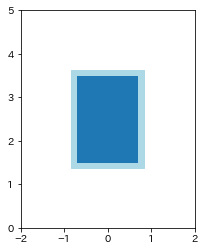

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

# plate is 17 inches wide = 1.4 feets
# strike zone is 1.5 to 3.5 height
# ball size　is 3 inches = 0.25 feets
# feet = inch / 12

# create strike zone
# blue frame is strike zone
platewidthInFeet = 17 / 12
szHeightInFeet = 3.5 - 1.5

# create strike zone wide for one ball
# lightblue frame is strike zone wide for one ball
expandedPlateInFeet = 20 / 12
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

# add strike zone to the figure
ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, 1.5 - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, 1.5), platewidthInFeet, szHeightInFeet))

plt.ylim(0, 5)
plt.xlim(-2, 2)
plt.show()

### DataFrameにストライク・ボールカウントを追加

In [46]:
uniqDesList = pitchDF.des.unique()
ballColList = [] 
strikeColList = []
ballCount = 0
strikeCount = 0

for index, row in pitchDF.iterrows():
    des = row['des']
    if row['abIdx'] == 1:
        ballCount = 0
        strikeCount = 0
    
    ballColList.append(ballCount)
    strikeColList.append(strikeCount)

    if 'Ball' in des:
        ballCount = ballCount + 1
    elif 'Foul' in des:
        if strikeCount is not 2:
            strikeCount = strikeCount + 1
    elif 'Strike' in des:
        strikeCount = strikeCount + 1

# add strike and ball count to dataframe
pitchDF['ballCount'] = ballColList
pitchDF['strikeCount'] = strikeColList

### データフレーム確認

In [9]:
pitchDF

,pitchIdx,inning,frame,ab,abIdx,batter,stand,speed,pitchtype,px,pz,szTop,szBottom,des,ballCount,strikeCount
1,1.0,1,top,1,1,Corey Dickerson,L,93.3,4-seam fb,-0.52,1.86,3.40,1.51,Foul,0,0
2,2.0,1,top,1,2,Corey Dickerson,L,93.3,4-seam fb,-0.37,2.75,3.40,1.51,Swinging Strike,0,1
3,3.0,1,top,1,3,Corey Dickerson,L,94.6,4-seam fb,-1.67,1.33,3.66,1.71,Ball,0,2
4,4.0,1,top,1,4,Corey Dickerson,L,90.5,slider,-2.00,0.36,3.53,1.58,Ball,1,2
5,5.0,1,top,1,5,Corey Dickerson,L,93.8,4-seam fb,-0.26,3.47,3.40,1.51,Foul,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253.0,9,top,64,1,Charlie Culberson,R,93.7,4-seam fb,-0.25,2.05,3.32,1.54,"In play, out(s)",0,0
254,254.0,9,top,65,1,Corey Dickerson,L,94.3,4-seam fb,0.65,3.06,3.40,1.51,Swinging Strike,0,0
255,255.0,9,top,65,2,Corey Dickerson,L,94.5,4-seam fb,0.00,4.02,3.40,1.51,Foul,0,1
256,256.0,9,top,65,3,Corey Dickerson,L,73.6,curveball,0.37,2.89,3.40,1.51,Foul,0,2


### Clayton Kershaw(Dodgers)の投球傾向

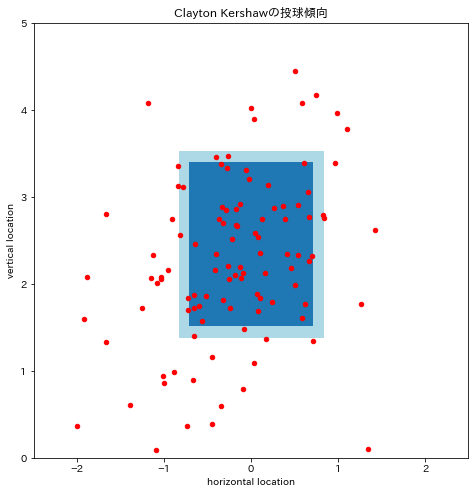

In [40]:
df= pitchDF.loc[pitchDF['frame']=='top']

ax1 = df.plot(kind='scatter', x='px', y='pz', marker='o', color='red', figsize=[8,8], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_title('Clayton Kershawの投球傾向')
ax1.set_aspect(aspect=1)

platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 
    
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.savefig('pitch_dodgers.png')
plt.show()

### Rockiesの投球傾向

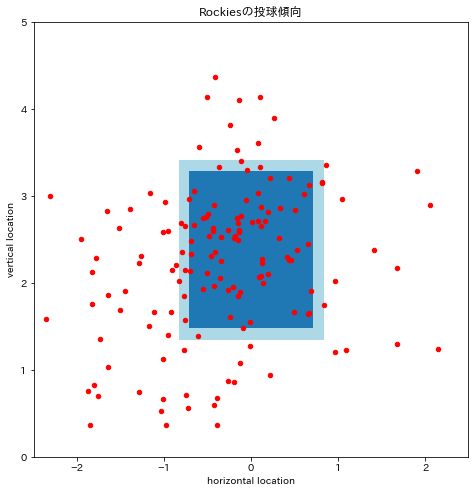

In [11]:
df= pitchDF.loc[pitchDF['frame']=='bottom']

ax1 = df.plot(kind='scatter', x='px', y='pz', marker='o', color='red', figsize=[8,8], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_title('Rockiesの投球傾向')
ax1.set_aspect(aspect=1)
        
platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 
    
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.savefig('pitch_rockies.png')
plt.show()

### Clayton Kershaw(Dodgers)の初球傾向

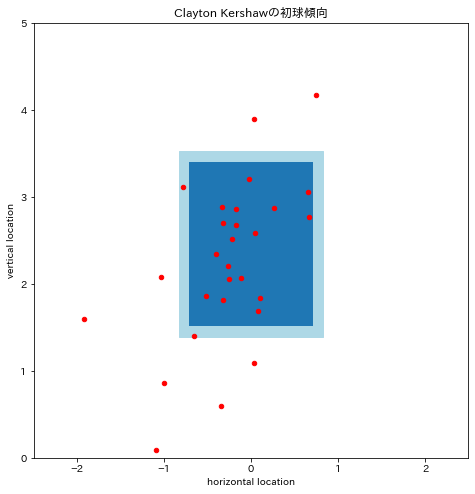

In [12]:
df= pitchDF.loc[pitchDF['frame']=='top'].loc[pitchDF['abIdx']==1]

ax1 = df.plot(kind='scatter', x='px', y='pz', marker='o', color='red', figsize=[8,8], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_title('Clayton Kershawの初球傾向')
ax1.set_aspect(aspect=1)
        
platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 
    
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.savefig('pitch_dodgers_firstball.png')
plt.show()

### Rockiesの初球傾向

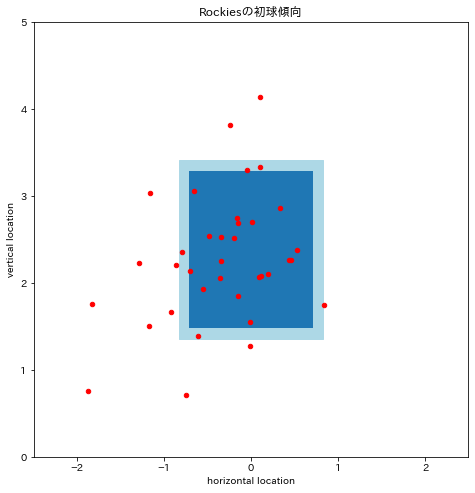

In [13]:
df= pitchDF.loc[pitchDF['frame']=='bottom'].loc[pitchDF['abIdx']==1]

ax1 = df.plot(kind='scatter', x='px', y='pz', marker='o', color='red', figsize=[8,8], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_title('Rockiesの初球傾向')
ax1.set_aspect(aspect=1)
        
platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 
    
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.savefig('pitch_rockies_firstball.png')
plt.show()

### Clayton Kershawの球速変化

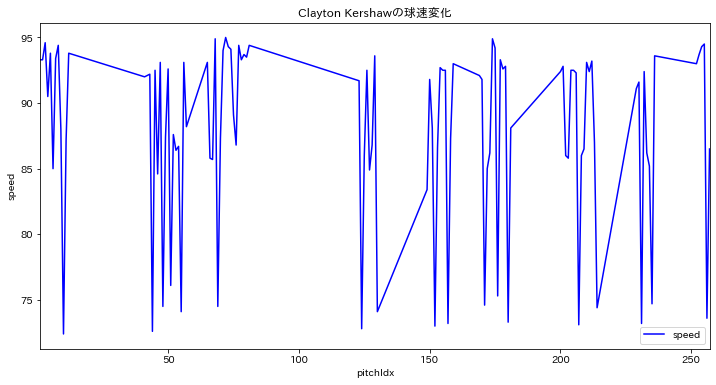

In [14]:
df = pitchDF.loc[(pitchDF['frame']=='top')]
ax = df.plot(x='pitchIdx', y='speed', color='blue', figsize=[12,6])
ax.set_ylabel('speed')
ax.set_title('Clayton Kershawの球速変化')
plt.savefig('pitch_dodgers_speed.png')
plt.show()

### Rockiesの球速変化

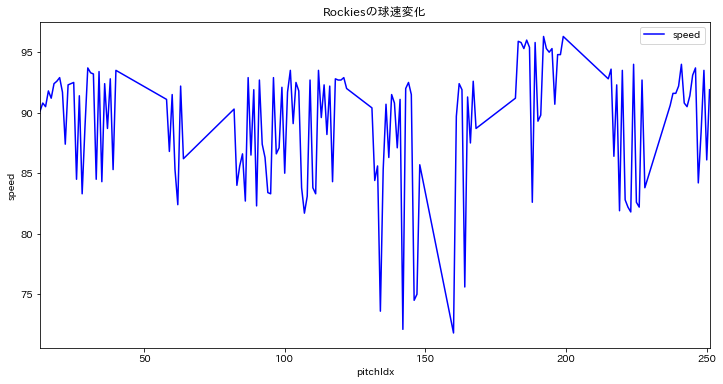

In [15]:
df = pitchDF.loc[(pitchDF['frame']=='bottom')]
ax = df.plot(x='pitchIdx', y='speed', color='blue', figsize=[12,6])
ax.set_ylabel('speed')
ax.set_title('Rockiesの球速変化')
plt.savefig('pitch_rockies_speed.png')
plt.show()

### Clayton Kershawの平均球速・最速・最遅

In [16]:
df= pitchDF.loc[pitchDF['frame']=='top']
df = df['speed']
print(sum(df) / len(df))
print(max(df))
print(min(df))
print(max(df) - min(df))

87.88504672897201
95.0
72.4
22.599999999999994


### Rockiesの平均球速・最速・最遅

In [48]:
df= pitchDF.loc[pitchDF['frame']=='bottom']
df = df['speed']
print(sum(df) / len(df))
print(max(df))
print(min(df))
print(max(df) - min(df))

89.13599999999998
96.3
71.8
24.5


### Clayton Kershaw投手（球種割合）

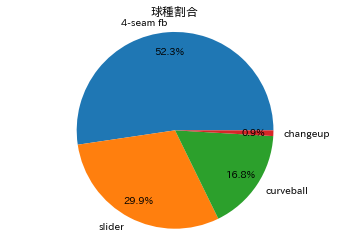

In [18]:
df = pitchDF.loc[(pitchDF['frame']=='top')]

df.pitchtype.value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=0.8)
plt.axis('equal')
plt.axis('off')
plt.title('球種割合')
plt.savefig('pitch_dodgers_ball.png')
plt.show()

### Clayton Kershaw投手（４-seamのイベント結果）

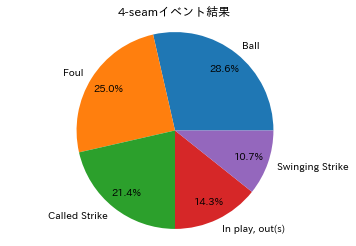

In [19]:
df = pitchDF.loc[(pitchDF['pitchtype']=='4-seam fb') & (pitchDF['frame']=='top')]

df.des.value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=0.8)
plt.axis('equal')
plt.axis('off')
plt.title('4-seamイベント結果')
plt.savefig('pitch_dodgers_4seam.png')
plt.show()

### Clayton Kershaw投手（sliderのイベント結果）

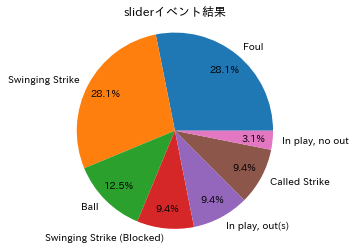

In [20]:
df = pitchDF.loc[(pitchDF['pitchtype']=='slider') & (pitchDF['frame']=='top')]

df.des.value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=0.8)
plt.axis('equal')
plt.axis('off')
plt.title('sliderイベント結果')
plt.savefig('pitch_dodgers_slider.png')
plt.show()

### Clayton Kershaw投手（curveballのイベント結果）

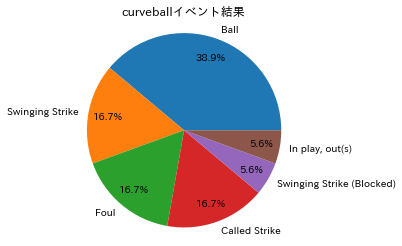

In [21]:
df = pitchDF.loc[(pitchDF['pitchtype']=='curveball') & (pitchDF['frame']=='top')]

df.des.value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=0.8)
plt.axis('equal')
plt.axis('off')
plt.title('curveballイベント結果')
plt.savefig('pitch_dodgers_curve.png')
plt.show()

### Clayton Kershaw投手（changeupのイベント結果）

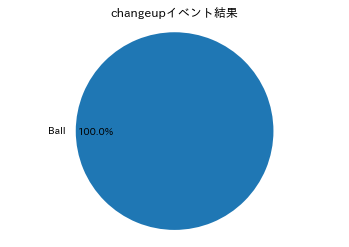

In [22]:
df = pitchDF.loc[(pitchDF['pitchtype']=='changeup') & (pitchDF['frame']=='top')]

df.des.value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=0.8)
plt.axis('equal')
plt.axis('off')
plt.title('changeupイベント結果')
plt.savefig('pitch_dodgers_changeup.png')
plt.show()

### Clayton Kershaw投手（カウント別球種割合）

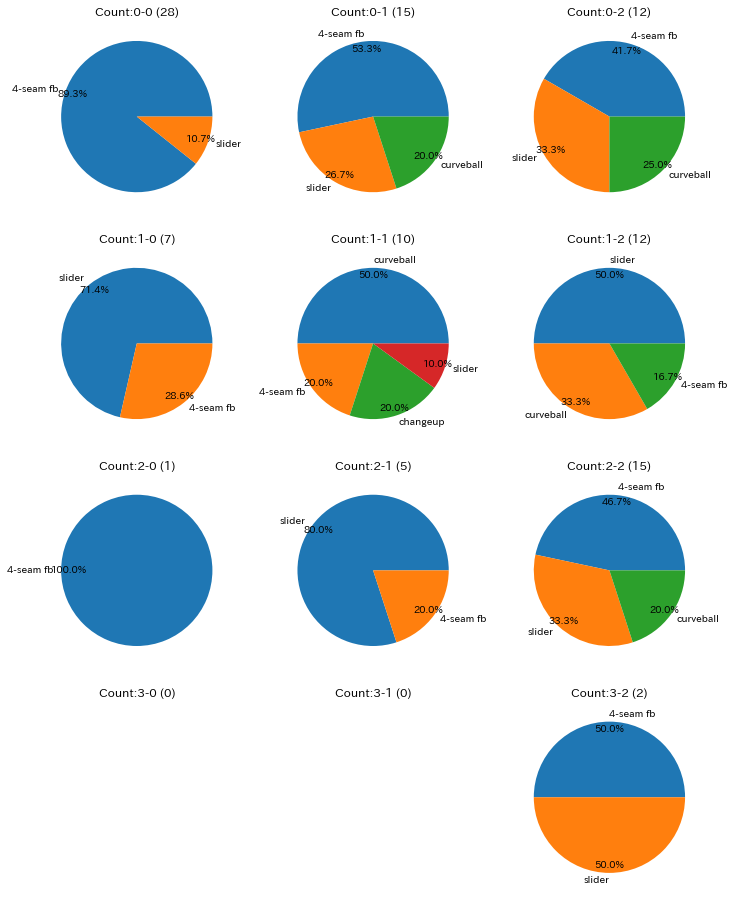

In [23]:
titleList = []
dataList = []

# create figure(4*3)
fig, axes = plt.subplots(4, 3, figsize=(12,16))

# create count
for b in range(4):
    for s in range(3):
        df = pitchDF.loc[(pitchDF['ballCount']==b) & (pitchDF['strikeCount']==s) & (pitchDF['frame']=='top')]
        title = "Count:" + str(b) + "-" + str(s) + " (" + str(len(df)) + ")"
        titleList.append(title)
        dataList.append(df)

for i, ax in enumerate(axes.flatten()):
     # get number of pitches at each type of pitches
    x = dataList[i].pitchtype.value_counts()
    # get type of pitches
    l = dataList[i].pitchtype.unique()

    ax.pie(x, autopct="%.1f%%", pctdistance=0.9, labels=l)
    ax.set_title(titleList[i])

plt.show()

### Rockies（球種割合）

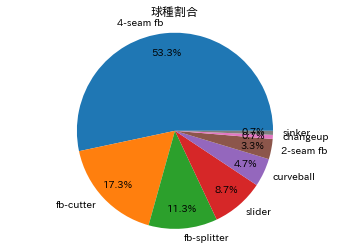

In [24]:
df = pitchDF.loc[(pitchDF['frame']=='bottom')]

df.pitchtype.value_counts().plot(kind='pie', autopct="%.1f%%", pctdistance=0.8)
plt.axis('equal')
plt.axis('off')
plt.title('球種割合')
plt.show()

### Rockies（カウント別球種割合）

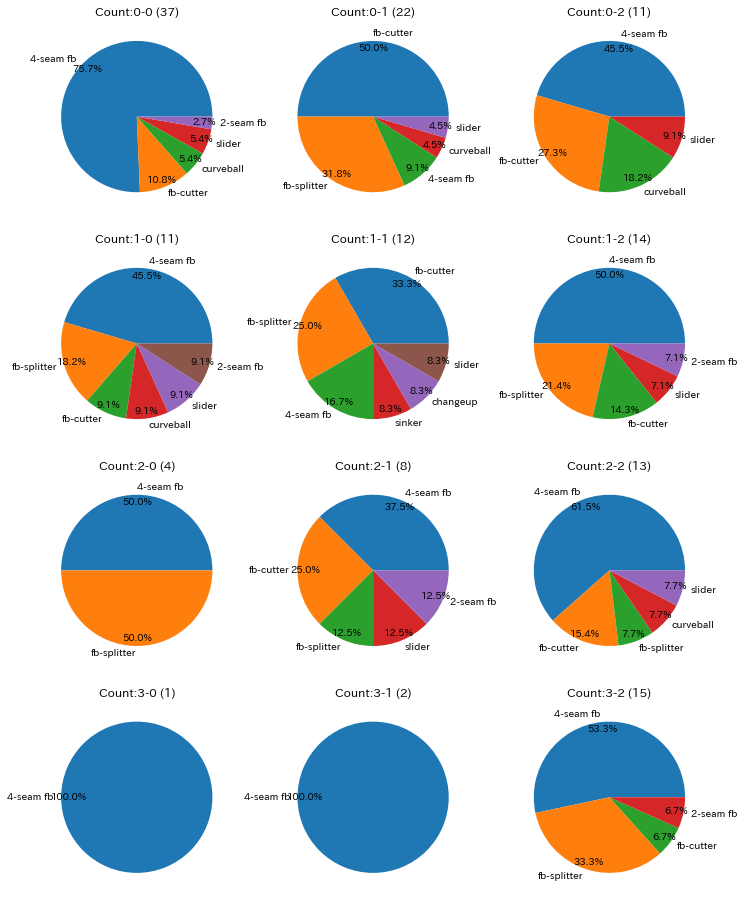

In [25]:
titleList = []
dataList = []

fig, axes = plt.subplots(4, 3, figsize=(12,16))

for b in range(4):
    for s in range(3):
        df = pitchDF.loc[(pitchDF['ballCount']==b) & (pitchDF['strikeCount']==s) & (pitchDF['frame']=='bottom')]
        title = "Count:" + str(b) + "-" + str(s) + " (" + str(len(df)) + ")"
        titleList.append(title)
        dataList.append(df)

for i, ax in enumerate(axes.flatten()):
    x = dataList[i].pitchtype.value_counts()
    l = dataList[i].pitchtype.unique()

    ax.pie(x, autopct="%.1f%%", pctdistance=0.9, labels=l)
    ax.set_title(titleList[i])

plt.show()

### 対 Corey Dickerson1打席目（球種・スピード・配球）

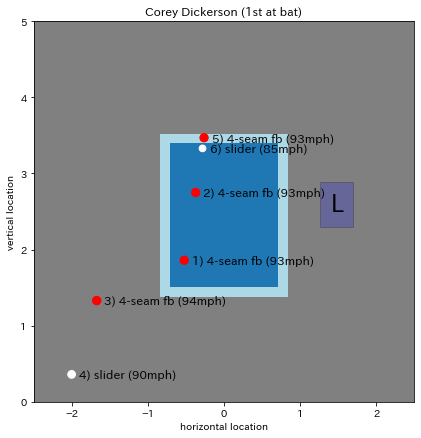

In [42]:
pitchColors = { "FA":"b", "FF":"red", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"white", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

# get batter nama, stand
df = pitchDF.loc[pitchDF['ab']=='1']
stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]

# get type of pitches and speed
pitchesUsed = df['pitchtype'].unique()
abCount = len(df['speed'])
markerSize = [0] * abCount
colors = ['b'] * abCount
for i, sx in enumerate(df['speed'].tolist()):
    markerSize[i] = int(sx -  70)*3
    thrownPitch = df['pitchtype'].tolist()[i]
    for j, (k, v) in enumerate(pitchDictionary.items()):
        if thrownPitch == v:
            colors[i] = pitchColors[k]

ax1 = df.plot(kind='scatter', x='px', y='pz',  color=colors, s=markerSize, marker="o", figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)
ax1.patch.set_facecolor("grey")
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.title(batter + " (1st at bat)")


platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 

# create stand
if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

ptypes = df["pitchtype"]
xcoords = df["px"]
ycoords = df["pz"]
speed = df["speed"]
abIdx = df["abIdx"]

for i, txt in enumerate(ptypes):
    txtDetail = str(abIdx.iloc[i]) + ") " + txt +  " (" + str(int(speed.iloc[i])) + "mph)"
    txt = ax1.text(xcoords.iloc[i]+.1, ycoords.iloc[i]-.05, txtDetail, style='italic', fontsize=12)

### 対 Corey Dickerson2打席目（球種・スピード・配球）

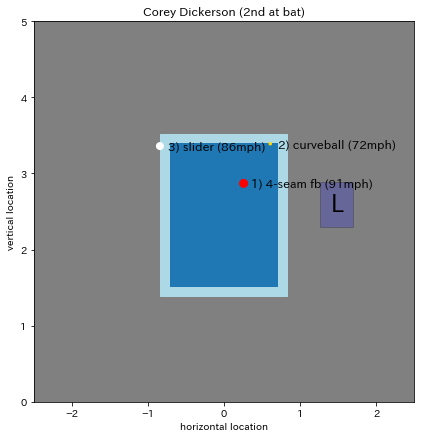

In [43]:
pitchColors = { "FA":"b", "FF":"red", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"white", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

df = pitchDF.loc[pitchDF['ab']=='28']
stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]

pitchesUsed = df['pitchtype'].unique()
abCount = len(df['speed'])
markerSize = [0] * abCount
colors = ['b'] * abCount
for i, sx in enumerate(df['speed'].tolist()):
    markerSize[i] = int(sx -  70)*3
    thrownPitch = df['pitchtype'].tolist()[i]
    for j, (k, v) in enumerate(pitchDictionary.items()):
        if thrownPitch == v:
            colors[i] = pitchColors[k]

ax1 = df.plot(kind='scatter', x='px', y='pz',  color=colors, s=markerSize, marker="o", figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)
ax1.patch.set_facecolor("grey")
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.title(batter + " (2nd at bat)")

platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 

if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

ptypes = df["pitchtype"]
xcoords = df["px"]
ycoords = df["pz"]
speed = df["speed"]
abIdx = df["abIdx"]

for i, txt in enumerate(ptypes):
    txtDetail = str(abIdx.iloc[i]) + ") " + txt +  " (" + str(int(speed.iloc[i])) + "mph)"
    txt = ax1.text(xcoords.iloc[i]+.1, ycoords.iloc[i]-.05, txtDetail, style='italic', fontsize=12)

### 対 Corey Dickerson3打席目（球種・スピード・配球）

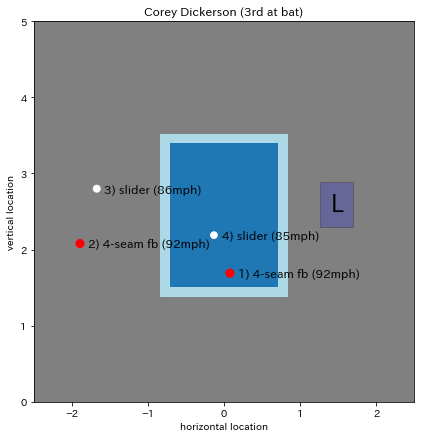

In [44]:
pitchColors = { "FA":"b", "FF":"red", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"white", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

df = pitchDF.loc[pitchDF['ab']=='49']
stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]

pitchesUsed = df['pitchtype'].unique()
abCount = len(df['speed'])
markerSize = [0] * abCount
colors = ['b'] * abCount
for i, sx in enumerate(df['speed'].tolist()):
    markerSize[i] = int(sx -  70)*3
    thrownPitch = df['pitchtype'].tolist()[i]
    for j, (k, v) in enumerate(pitchDictionary.items()):
        if thrownPitch == v:
            colors[i] = pitchColors[k]

ax1 = df.plot(kind='scatter', x='px', y='pz',  color=colors, s=markerSize, marker="o", figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)
ax1.patch.set_facecolor("grey")
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.title(batter + " (3rd at bat)")

platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 

if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

ptypes = df["pitchtype"]
xcoords = df["px"]
ycoords = df["pz"]
speed = df["speed"]
abIdx = df["abIdx"]

for i, txt in enumerate(ptypes):
    txtDetail = str(abIdx.iloc[i]) + ") " + txt +  " (" + str(int(speed.iloc[i])) + "mph)"
    txt = ax1.text(xcoords.iloc[i]+.1, ycoords.iloc[i]-.05, txtDetail, style='italic', fontsize=12)

### 対 Corey Dickerson4打席目（球種・スピード・配球）

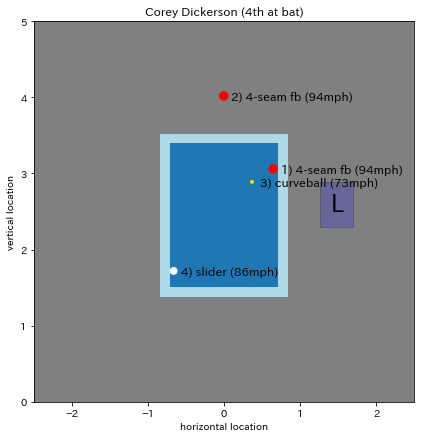

In [45]:
pitchColors = { "FA":"b", "FF":"red", "FT": "y", "FC": "k", "":"w", None: "violet",
                    "FS":"aqua", "SL":"white", "CH":"h","CU":"gold","KC":"tan",
                    "KN":"^","EP":"*", "UN":"X", "PO":"s", "SI":"_", "SF":"seagreen"
                    }

df = pitchDF.loc[pitchDF['ab']=='65']
stand = df['stand'].iloc[0]
batter = df['batter'].iloc[0]

pitchesUsed = df['pitchtype'].unique()
abCount = len(df['speed'])
markerSize = [0] * abCount
colors = ['b'] * abCount
for i, sx in enumerate(df['speed'].tolist()):
    markerSize[i] = int(sx -  70)*3
    thrownPitch = df['pitchtype'].tolist()[i]
    for j, (k, v) in enumerate(pitchDictionary.items()):
        if thrownPitch == v:
            colors[i] = pitchColors[k]

ax1 = df.plot(kind='scatter', x='px', y='pz',  color=colors, s=markerSize, marker="o", figsize=[7,7], ylim=[0,4], xlim=[-2,2])
ax1.set_xlabel('horizontal location')
ax1.set_ylabel('vertical location')
ax1.set_aspect(aspect=1)
ax1.patch.set_facecolor("grey")
plt.ylim(0, 5)
plt.xlim(-2.5, 2.5)
plt.title(batter + " (4th at bat)")

platewidthInFeet = 17 / 12
expandedPlateInFeet = 20 / 12
szTop = df["szTop"].iloc[0]
szBottom = df["szBottom"].iloc[0]
szHeightInFeet = szTop - szBottom

outrect = ax1.add_patch(patches.Rectangle((expandedPlateInFeet/-2, szBottom - 0.125), expandedPlateInFeet, szHeightInFeet + 0.25, color='lightblue'))
rect = ax1.add_patch(patches.Rectangle((platewidthInFeet/-2, szBottom), platewidthInFeet, szHeightInFeet))
outrect.zorder=-2 
rect.zorder=-1 

if stand == 'R':
    standTextX = -1.5
else:
    standTextX = 1.4
tbatter = ax1.text(standTextX, 2.5, stand, style='italic', fontsize=24,
        bbox={'facecolor': 'blue', 'alpha': 0.2, 'pad': 10})

ptypes = df["pitchtype"]
xcoords = df["px"]
ycoords = df["pz"]
speed = df["speed"]
abIdx = df["abIdx"]

for i, txt in enumerate(ptypes):
    txtDetail = str(abIdx.iloc[i]) + ") " + txt +  " (" + str(int(speed.iloc[i])) + "mph)"
    txt = ax1.text(xcoords.iloc[i]+.1, ycoords.iloc[i]-.05, txtDetail, style='italic', fontsize=12)